In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

# Q1
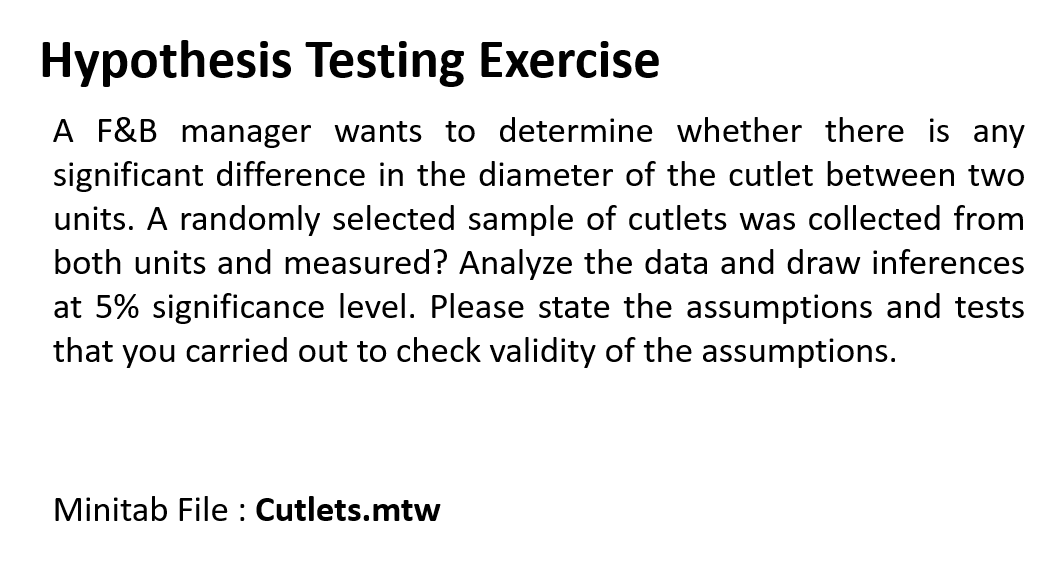
Step1 Business Problem Two check whether the diameter of two units are similar or not?

Step2 y and x So here is y is continuous and x is discrete 

Step3 Here we will use 2-sample t test 

Step4 Find normality of this data

In [2]:
Cutlets = pd.read_csv("Cutlets.csv")
Cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
Cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
Cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [5]:
Cutlets[Cutlets.duplicated()].shape

(0, 2)

In [6]:
Cutlets[Cutlets.duplicated()]

,Unit A,Unit B


In [7]:
Cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


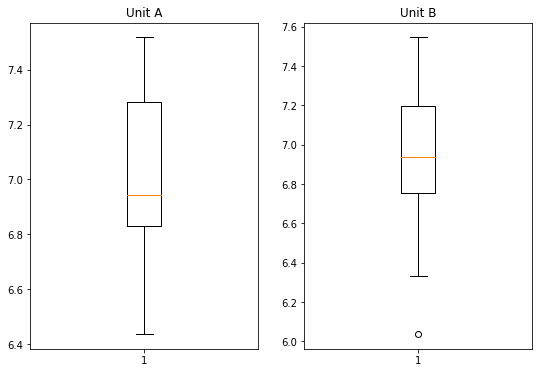

In [8]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(Cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(Cutlets['Unit B'])
plt.title('Unit B')
plt.show()

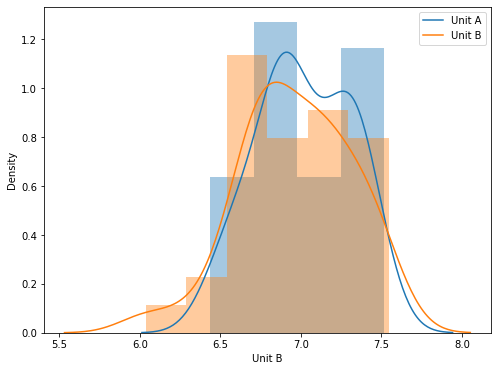

In [9]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(Cutlets['Unit A'], kde = True)
sns.distplot(Cutlets['Unit B'],hist = True)
plt.legend(labels)

# Plotting Q-Q plot to check whether the distribution follows normal distribution or not


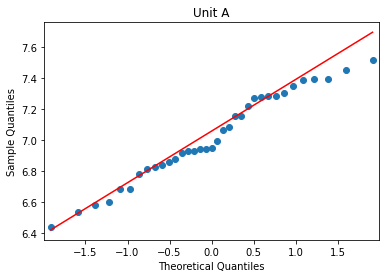

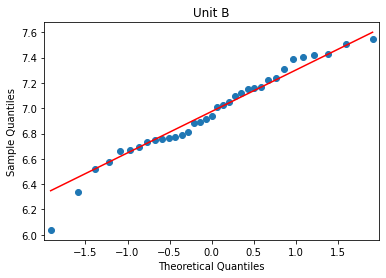

In [10]:
sm.qqplot(Cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(Cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

# Plotting Q-Q plot to check whether the distribution follows normal distribution or not


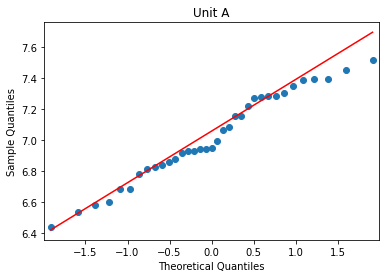

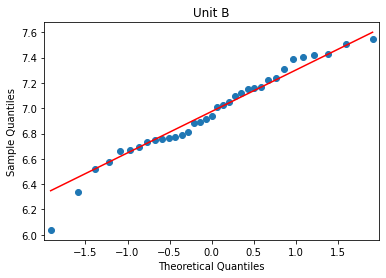

In [11]:
sm.qqplot(Cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(Cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

# Comparing Evidences with Hypothesis using t-statistics


In [12]:
statistic , p_value = stats.ttest_rel(Cutlets['Unit A'],Cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4562300768038412


In [13]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis and there is no Significance difference between Unit A and Unit B')

Significnace=0.025, p=0.456
We fail to reject Null hypothesis and there is no Significance difference between Unit A and Unit B


# Hence, We fail to reject Null Hypothesis, there is no significant difference between the two samples

# Q2
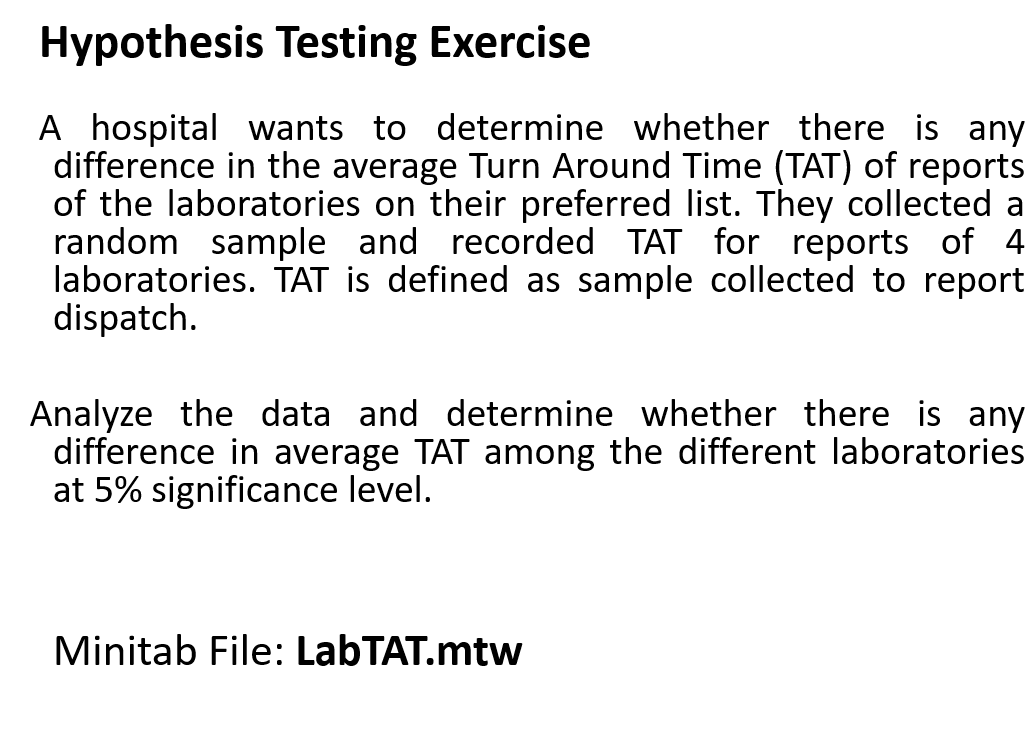
Step1 Business Problem Two check whether there is any difference in average TAT 

Step2 y and x So here is 4 labs are input TAT(Turn around time) is output x is more than 2 discrete and y is continous 

Step3 Here we will use ANOVA-One way Find difference between 4 labrotaries with respect to time X -> 4 labratory y -> TAT(Turn around time) 

Step4 Find normality of this data

In [14]:
Labtat = pd.read_csv('LabTAT.csv')

In [15]:
Labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [16]:
Labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [17]:
Labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [18]:
Labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [20]:
Labtat[Labtat.duplicated()].shape

(0, 4)

In [21]:
Labtat[Labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


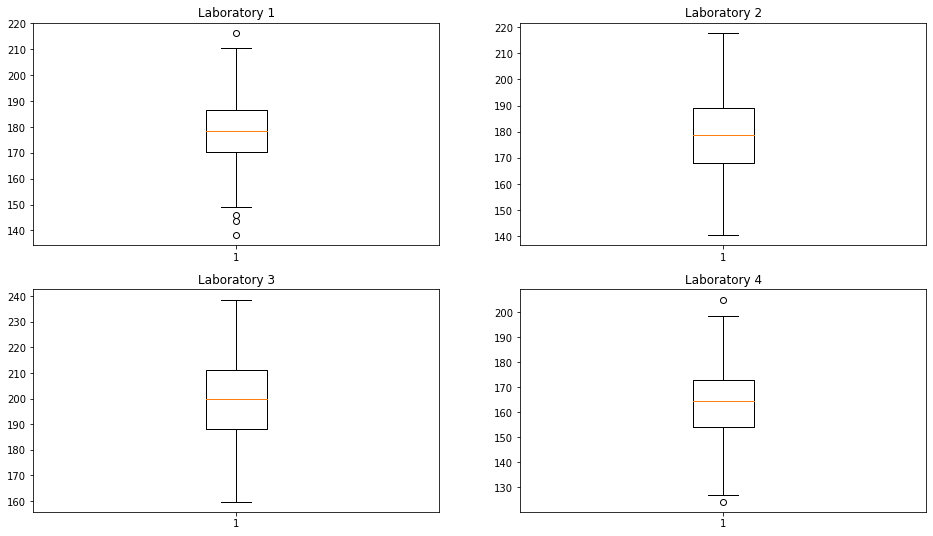

In [22]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(Labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(Labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(Labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(Labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

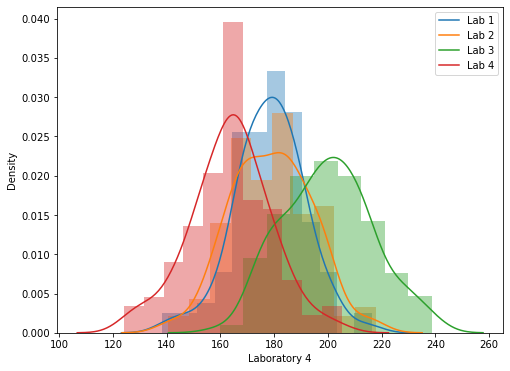

In [23]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(Labtat['Laboratory 1'], kde = True)
sns.distplot(Labtat['Laboratory 2'],hist = True)
sns.distplot(Labtat['Laboratory 3'],hist = True)
sns.distplot(Labtat['Laboratory 4'],hist = True)
plt.legend(labels)

# Plotting Q-Q plot to check whether the distribution follows normal distribution or not


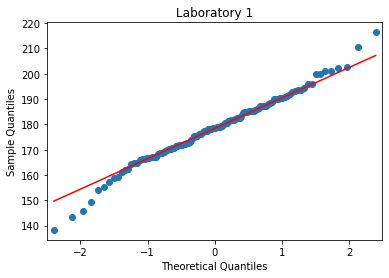

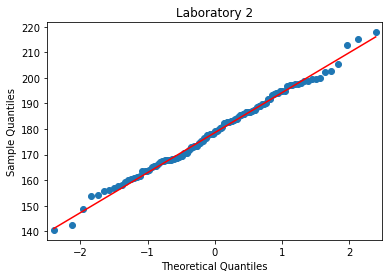

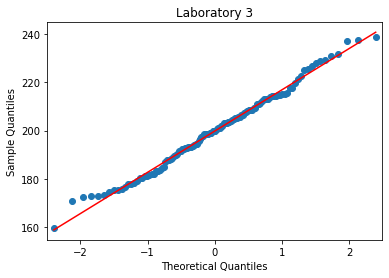

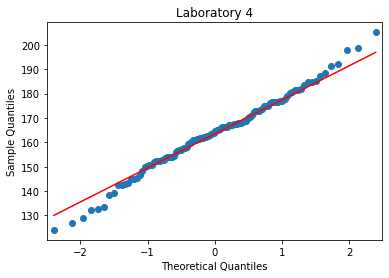

In [24]:
sm.qqplot(Labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(Labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(Labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(Labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

# Comparing Evidences with Hypothesis using t-statictic


In [25]:
test_statistic , p_value = stats.f_oneway(Labtat.iloc[:,0],Labtat.iloc[:,1],Labtat.iloc[:,2],Labtat.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [26]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples


# Q3
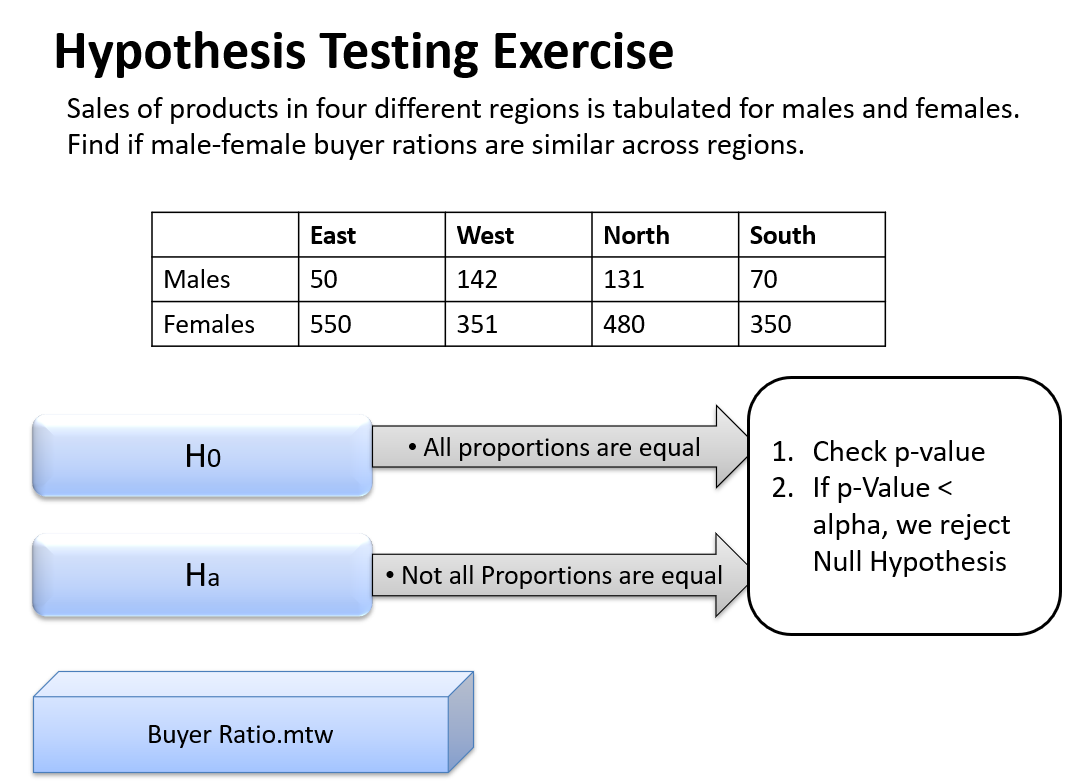
Step1 Business Problem Two find buyer ratios are similar across region or not 

Step2 y and x x is more than 2 discrete and y is discrete 

Step3 Here we will use Chi-square test

Step4 Find normality of this data

In [27]:
buyer = pd.read_csv("BuyerRatio.csv")

In [28]:
buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [29]:
buyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [30]:
buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


# Applying Chi-Square  contingency table to convert observed value into expected value

In [32]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

In [33]:
from scipy.stats import chi2_contingency

In [34]:
chi2_contingency(table)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [35]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [36]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [37]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis



# We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# Q4
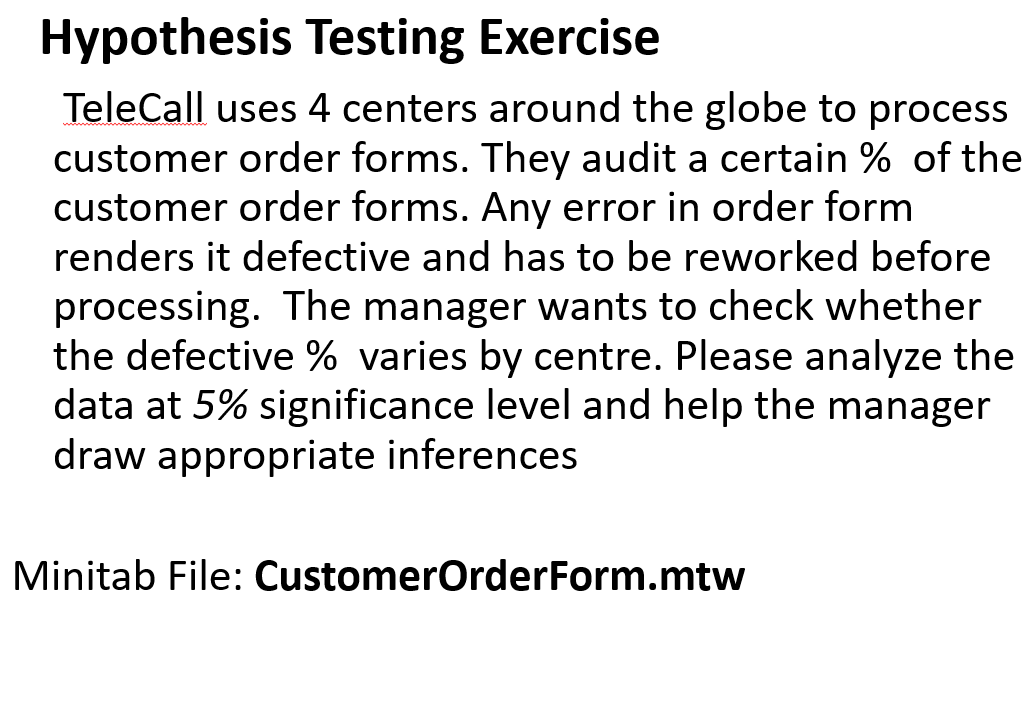
Step1 Business Problem To check whether the defective % varies by center or not 

Step2 y and x x is more than 2 discrete and y is discrete

Step3 Here we will use Chi-square test Chi-Square Test H0:All are same Ha:atleast 1 are different

In [38]:
centers = pd.read_csv('Costomer+OrderForm.csv')
centers.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [39]:
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [40]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [41]:
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [42]:
centers[centers.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


In [43]:
print(centers['Phillippines'].value_counts(),'\n',centers['Indonesia'].value_counts(),'\n',centers['Malta'].value_counts(),'\n',centers['India'].value_counts())


Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [44]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [45]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)
Statistics =  3.858960685820355 

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [46]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [47]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


# We fail to reject Null Hypothesis because of lack of evidence.
